In [21]:
import pandas as pd

%matplotlib inline

import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
from scipy.stats import pearsonr, normaltest
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 
import os
# turn airport into numeric ids with LabelEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 
import pandas as pd

In [22]:
df = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/starter-code/MASTER_Project7_withNoProbelmPerecent.csv')

In [23]:
df = df.ix[:,1:]

In [24]:
df =df[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [25]:
df.head() 

,Airport,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,...,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Arrival Percentage,Departure Percentage,No Diversion Percentage,Overall Chance of No Problems
0,SJU,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,0.7984,...,2.27,12.43,1.88,0.79,3.39,12.28,0.994906,0.994534,0.998582,0.996007
1,SJU,315.0,282.0,64.0,36.0,57736.0,54870.0,0.7789,0.7464,0.7604,...,3.03,14.43,1.63,1.36,4.04,14.65,0.994861,0.994544,0.998224,0.995876
2,SJU,257.0,233.0,63.0,44.0,55707.0,52948.0,0.8054,0.7446,0.7611,...,4.28,14.34,1.73,1.29,4.19,14.17,0.995599,0.995387,0.998030,0.996339
3,SJU,307.0,278.0,70.0,42.0,47987.0,47246.0,0.8014,0.7522,0.7414,...,3.16,14.97,1.55,1.71,4.09,16.31,0.994116,0.993602,0.997648,0.995122
4,SJU,238.0,197.0,78.0,29.0,44493.0,43448.0,0.8004,0.7810,0.7533,...,1.85,13.59,1.64,1.25,3.75,15.18,0.995466,0.994651,0.997567,0.995894


In [26]:
df= df[[0,10,11,12,13,14,15,16,17,21]]

In [27]:
df.head()

,Airport,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Overall Chance of No Problems
0,SJU,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28,0.996007
1,SJU,12.74,14.14,3.03,14.43,1.63,1.36,4.04,14.65,0.995876
2,SJU,11.61,15.75,4.28,14.34,1.73,1.29,4.19,14.17,0.996339
3,SJU,12.53,15.22,3.16,14.97,1.55,1.71,4.09,16.31,0.995122
4,SJU,12.54,14.22,1.85,13.59,1.64,1.25,3.75,15.18,0.995894


In [28]:
x = df.ix[:,1:11].values
y = df.ix[:,0].values

In [29]:
x

array([[ 11.19      ,  13.84      ,   2.27      , ...,   3.39      ,
         12.28      ,   0.99600747],
       [ 12.74      ,  14.14      ,   3.03      , ...,   4.04      ,
         14.65      ,   0.9958762 ],
       [ 11.61      ,  15.75      ,   4.28      , ...,   4.19      ,
         14.17      ,   0.99633883],
       ..., 
       [ 10.01      ,  11.71      ,   1.52      , ...,   3.75      ,
          9.33      ,   0.99699592],
       [  9.18      ,  12.03      ,   1.51      , ...,   3.82      ,
          8.46      ,   0.9978748 ],
       [ 11.33      ,  11.33      ,   1.33      , ...,   4.57      ,
         10.82      ,   0.99817659]])

In [30]:
xStand = preprocessing.StandardScaler().fit_transform(x)

In [31]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [33]:
print 'eigenValues:  ',eigenValues
print 'eigenVectors: ',eigenVectors

eigenValues:   [  5.13757026e+00   1.38117426e+00   8.75012928e-01   6.49650613e-01
   4.89814131e-01   3.09278021e-01   1.20205181e-03   9.34610622e-02
   7.40307049e-02]
eigenVectors:  [[ 0.3110621   0.55536353  0.04653888  0.13358798 -0.25907234 -0.23622356
   0.54507974  0.37301178  0.12502138]
 [ 0.37116798 -0.35524843  0.10990635  0.03925372 -0.19746991  0.40060456
  -0.01470302  0.08918032  0.71747121]
 [ 0.38108503 -0.3338969  -0.01662293 -0.02068267 -0.21244324  0.39857062
   0.38024823 -0.05233087 -0.62551184]
 [ 0.40973347  0.23632898  0.0238048   0.08155538 -0.30743635  0.01395676
  -0.74691826  0.24177083 -0.24082614]
 [ 0.30673352 -0.18568797  0.06756336 -0.76678979 -0.10992475 -0.49775751
   0.00719564 -0.13031044  0.04499513]
 [ 0.29243543 -0.38578318 -0.05301996  0.61260359  0.05014369 -0.58098628
   0.00228429 -0.21791818 -0.00236393]
 [ 0.3345158  -0.01605128  0.32788117 -0.04163448  0.80635418  0.04481796
  -0.01000979  0.34727377 -0.07541266]
 [ 0.34795964  0.46274

In [34]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.13757026126
1.38117425684
0.875012928068
0.649650612662
0.489814130871
0.309278021182
0.0934610622352
0.0740307049172
0.00120205180988


In [35]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [36]:
print varExpl

[57.013202071151944, 15.327316804713579, 9.7102883942965654, 7.2093732585279708, 5.4356185123626162, 3.4321536098000753, 1.0371662392977852, 0.8215415700958647, 0.013339539753578445]


In [38]:
cvarex = np.cumsum(varExpl)

In [39]:
print cvarex 

[ 57.01320207  72.34051888  82.05080727  89.26018053  94.69579904
  98.12795265  99.16511889  99.98666046 100.        ]


In [40]:
PCA_A = PCA(n_components=3)
Y = PCA_A.fit_transform(xStand)

In [41]:
print Y

[[-1.43882324  0.02522123  0.74945889]
 [-0.32782604 -0.34086006  0.95329074]
 [-0.10854656  0.25806069  1.11900083]
 ..., 
 [-1.89554364  0.55509315  1.09202614]
 [-2.22002802  0.89958008  1.23587191]
 [-1.18508192  0.10972992  1.6320868 ]]


In [42]:
Ydf = pd.DataFrame(Y, columns=["PC1", "PC2", "PCA3"])

In [ ]:
airports2 = df[['airport', 'year']]

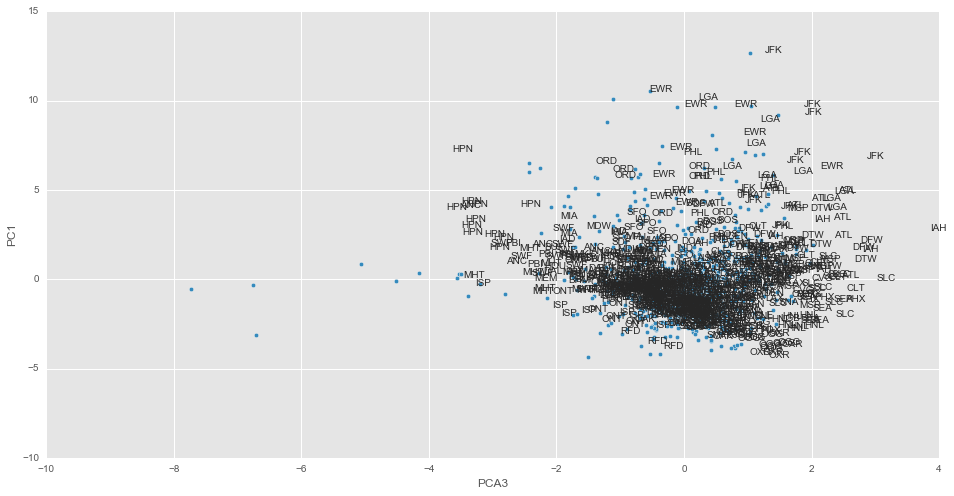

In [45]:
graph = Ydf.plot(kind='scatter', x='PCA3', y='PC1', figsize=(16,8))

for i, airport in enumerate(df['Airport']):
    graph.annotate(airport, (Ydf.iloc[i].PC2, Ydf.iloc[i].PC1))

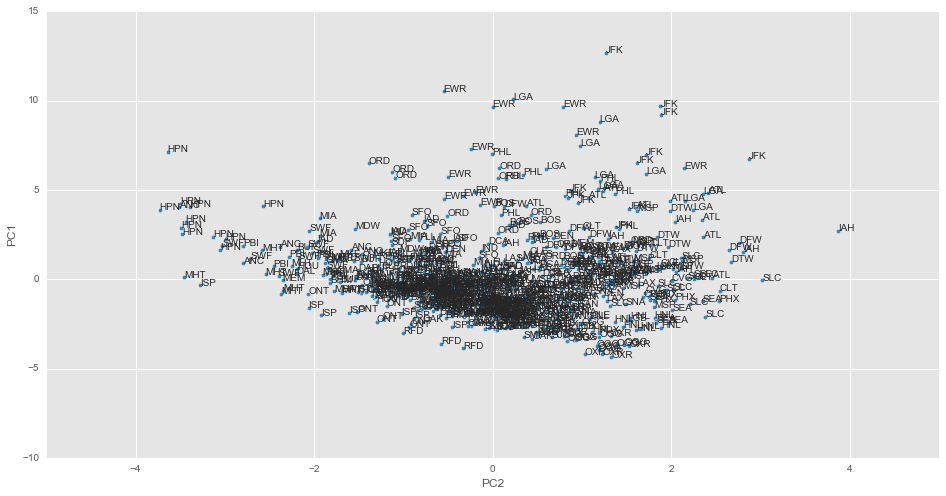

In [46]:
graph = Ydf.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(df['Airport']):
    graph.annotate(airport, (Ydf.iloc[i].PC2, Ydf.iloc[i].PC1))

In [29]:
# turn airport into numeric ids with LabelEncoder
le = LabelEncoder()
tmp = le.fit_transform(df['Airport'])
df['Airport'] = tmp

In [30]:
y = df.ix[:,0]
x= df.ix[:,1:]

In [32]:
X = x.as_matrix(columns=None)
X

array([[ 330.        ,  289.        ,   55.        , ...,    0.9945338 ,
           0.99858248,    0.99600747],
       [ 315.        ,  282.        ,   64.        , ...,    0.99454413,
           0.9982239 ,    0.9958762 ],
       [ 257.        ,  233.        ,   63.        , ...,    0.99538658,
           0.99803046,    0.99633883],
       ..., 
       [ 216.        ,  284.        ,   78.        , ...,    0.99692842,
           0.99833303,    0.99699592],
       [ 141.        ,  184.        ,   65.        , ...,    0.99798525,
           0.99844965,    0.9978748 ],
       [ 111.        ,  162.        ,   74.        , ...,    0.9984388 ,
           0.99851963,    0.99817659]])

In [35]:
k = range(1,20)

kmeansList= []
for i in k:
    kmeans = cluster.KMeans(n_clusters= i)
    kmeans.fit(X)
    labels = kmeans.labels_
    kmeansList.append(metrics.accuracy_score(y, labels))

(array([ 3.,  4.,  1.,  6.,  0.,  2.,  0.,  1.,  0.,  2.]),
 array([ 0.00372671,  0.00695652,  0.01018634,  0.01341615,  0.01664596,
         0.01987578,  0.02310559,  0.0263354 ,  0.02956522,  0.03279503,
         0.03602484]),
 <a list of 10 Patch objects>)

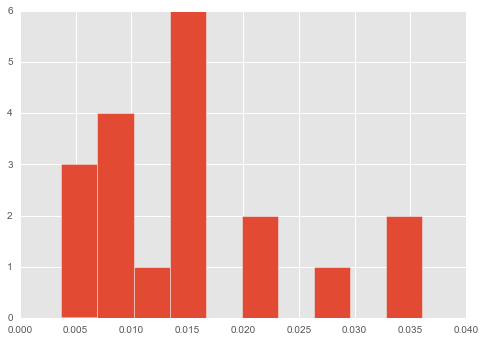

In [36]:
plt.hist(kmeansList)

In [38]:
metrics.silhouette_score(X, labels, metric='euclidean')


0.55049706853152103

In [39]:

knn = KNeighborsClassifier()
knn.fit(X, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
exp = labels
predicted = knn.predict(x)

In [41]:
print(metrics.classification_report(exp, predicted))
print(metrics.confusion_matrix(exp, predicted))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       121
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00        41
          3       0.93      1.00      0.96        13
          4       1.00      0.98      0.99        60
          5       1.00      1.00      1.00        21
          6       1.00      0.97      0.98        33
          7       1.00      0.99      0.99        98
          8       1.00      0.90      0.95        10
          9       0.98      1.00      0.99        56
         10       1.00      1.00      1.00        40
         11       1.00      1.00      1.00        42
         12       1.00      1.00      1.00        86
         13       1.00      1.00      1.00        14
         14       0.96      1.00      0.98        48
         15       1.00      1.00      1.00         5
         16       1.00      1.00      1.00        21
         17       1.00      0.98      0.99   

In [42]:
Z = linkage(X, 'ward')


In [43]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.69762372691011876

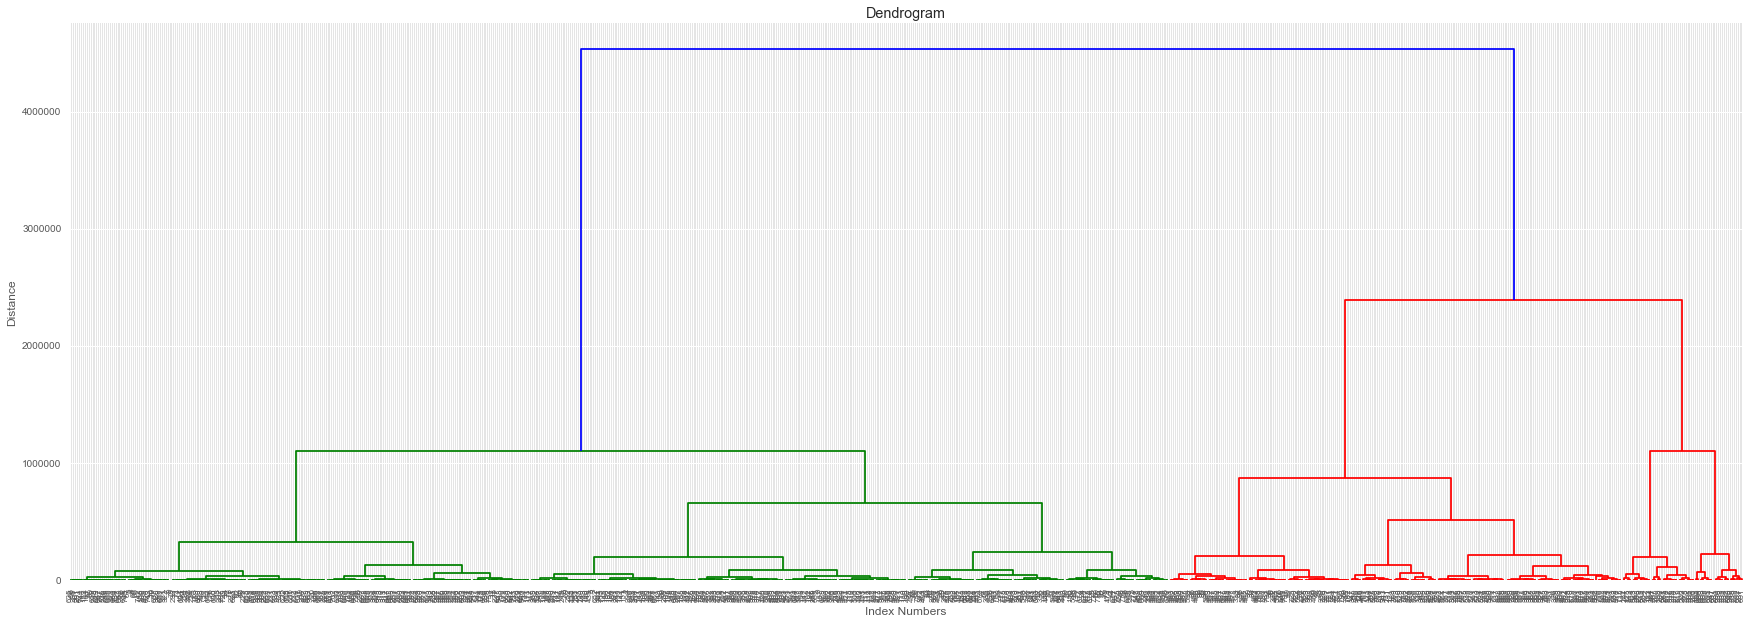

In [44]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()


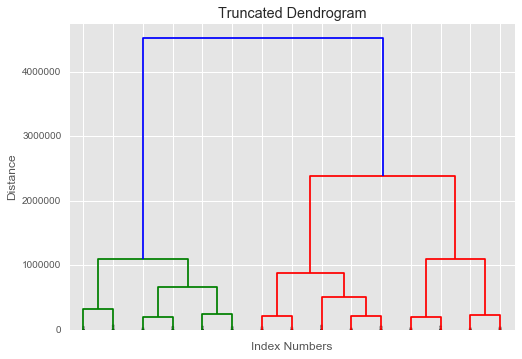

In [45]:

plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [46]:
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([370, 268, 269, 251,  31, 253, 239,  48,  32,  49,  39, 129,  83,
        71,  78, 114, 108, 204, 205, 113, 117,  68, 463, 453, 487, 503,
       454, 467, 420, 421, 474, 472, 471, 568, 569, 578, 579, 540, 541,
       570, 589, 587, 604, 603, 501, 527, 506, 518, 513, 485, 480, 481,
       496, 482, 498, 140,  28,  10,   1,  11,  84,  79,  80,  63,  54,
        58,  29,  33,  30, 240,  40,  52,  76,  77,  53,  50,  73, 440,
       509, 497, 493, 441, 419, 412, 413, 407, 408, 404, 585, 615, 599,
       717, 592, 544, 546, 548, 545, 564, 562, 284, 286, 255, 356, 366,
       279, 275, 276, 287, 288, 297, 400, 384, 385, 402, 381, 360, 367,
       351, 374, 394, 334, 634, 748, 760, 761, 752, 621, 617, 623, 635,
       648, 637, 386, 254,  25, 244, 227, 238, 241, 229, 248, 278, 301,
       173, 264, 257, 378, 353, 289, 294, 262, 265, 363, 355, 135, 246,
       236, 230,  34,   8,  69,   9,  66,  61,  57, 128, 118, 124,  89,
       103, 216, 221, 222, 213, 197, 198, 451, 486, 490, 499, 48

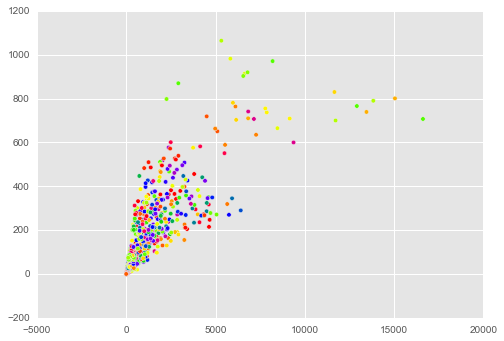

In [47]:
plt.scatter(X[:,0], X[:,2], c=clusters, cmap='prism')
plt.show()

In [48]:
trees2 = ExtraTreesClassifier()
trees2.fit(X, clusters)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
print(X[:5])

print(trees2.feature_importances_)

[[  3.30000000e+02   2.89000000e+02   5.50000000e+01   2.80000000e+01
    6.03710000e+04   5.67350000e+04   8.01900000e-01   7.79400000e-01
    7.98400000e-01   1.11900000e+01   1.38400000e+01   2.27000000e+00
    1.24300000e+01   1.88000000e+00   7.90000000e-01   3.39000000e+00
    1.22800000e+01   9.94906143e-01   9.94533799e-01   9.98582481e-01
    9.96007474e-01]
 [  3.15000000e+02   2.82000000e+02   6.40000000e+01   3.60000000e+01
    5.77360000e+04   5.48700000e+04   7.78900000e-01   7.46400000e-01
    7.60400000e-01   1.27400000e+01   1.41400000e+01   3.03000000e+00
    1.44300000e+01   1.63000000e+00   1.36000000e+00   4.04000000e+00
    1.46500000e+01   9.94860580e-01   9.94544132e-01   9.98223896e-01
    9.95876202e-01]
 [  2.57000000e+02   2.33000000e+02   6.30000000e+01   4.40000000e+01
    5.57070000e+04   5.29480000e+04   8.05400000e-01   7.44600000e-01
    7.61100000e-01   1.16100000e+01   1.57500000e+01   4.28000000e+00
    1.43400000e+01   1.73000000e+00   1.29000000e+

In [50]:
knn2 = KNeighborsClassifier()
knn2.fit(X, clusters)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
print(metrics.classification_report(exp, predicted))
print(metrics.confusion_matrix(exp, predicted))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       121
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00        41
          3       0.93      1.00      0.96        13
          4       1.00      0.98      0.99        60
          5       1.00      1.00      1.00        21
          6       1.00      0.97      0.98        33
          7       1.00      0.99      0.99        98
          8       1.00      0.90      0.95        10
          9       0.98      1.00      0.99        56
         10       1.00      1.00      1.00        40
         11       1.00      1.00      1.00        42
         12       1.00      1.00      1.00        86
         13       1.00      1.00      1.00        14
         14       0.96      1.00      0.98        48
         15       1.00      1.00      1.00         5
         16       1.00      1.00      1.00        21
         17       1.00      0.98      0.99   

In [52]:

PCA_ap = PCA(n_components=4)
Y = PCA_ap.fit_transform(X)

In [55]:
# print PCA_ap.n_components
# print PCA_set.explained_variance_
x_vals = np.arange(1, PCA_ap.n_components)
x_vals

array([1, 2, 3])

In [56]:
ap_pca = pd.DataFrame(Y, columns=['PC1', 'PC2', 'PC3', 'PC4'])
ap_pca.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4
234,532754.166497,-658.597413,-2162.571054,156.853929
689,526791.299544,6939.132124,-955.282603,-492.908381
232,523091.593869,8910.653595,-4545.380440,-120.211394
233,521040.325161,-860.091586,-1809.627838,-36.012916
235,520643.726854,-1718.395448,-1318.273489,266.313963
236,516609.825464,-2230.146139,-1026.661732,339.971994
231,512937.614884,973.312023,-1979.318704,-125.753006
690,510692.215994,2929.325897,1143.268675,-443.103809
237,502261.687306,2030.039953,-1986.208028,17.150805
691,500708.913143,9238.568217,-733.749908,-119.062138


In [57]:
PCA_chain = PCA(n_components=4)
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', PCA_chain), ('logistic', logistic)])


In [58]:
PCA_chain.fit(X)


PCA(copy=True, n_components=4, whiten=False)

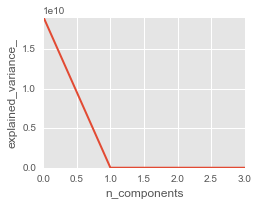

In [59]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(PCA_chain.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')